# <font color="darkblue"> Prática 01: Regressão Linear - Renda Média Brasileira </font>

**Objetivos:**


*   Implementar o algoritmo de Regressão Linear
*   Fixar o conceito de regressão sobre dados e seus uso para previsão

**Requisitos de execução:**


*   Upload do arquivo *read_series.py*
*   Criar o diretório *data* e upload do arquivo *renda_Brasil_2012_2020.csv* neste diretório

**Atividade 1:**

Leia a série temporal das rendas médias das famílias brasileiras contidas no arquivo *renda_Brasil_2012_2020.csv* e plote seus valores em um gráfico de dispersão.









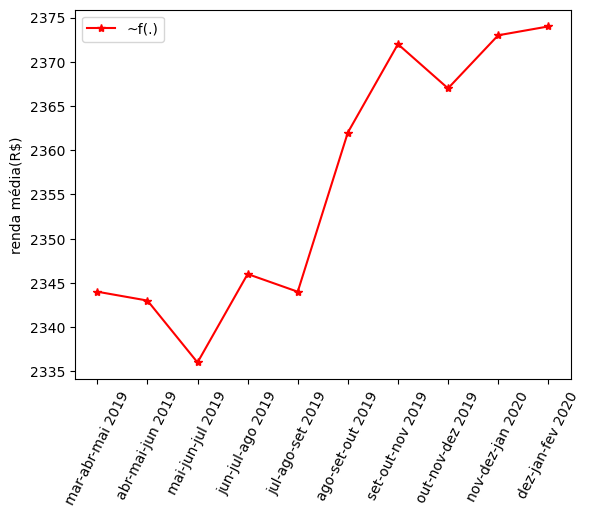

In [33]:
from read_series import ReadSeries
from matplotlib import pyplot as plt
import numpy as np

def config_plt():
    fig, ax = plt.subplots()
    #rotacionar os label do eixo x (datas)
    for label in ax.get_xticklabels():
        label.set_rotation(90*(-180/np.pi)+180)

    plt.ylabel('renda média(R$)')


data = []
time = []
rs = ReadSeries()
rs.read_income_csv(data, time)

_data = data[86:96]
_timeLabel = time[86:96]
_time = [i for i in range(len(_timeLabel))]

_timePstring = time[96:]
_timePredict = [i for i in range(len(_timeLabel) , len(_timeLabel)+len(_timePstring))]


config_plt()

plt.plot(_timeLabel, _data, 'r-*')
plt.legend(['~f(.)'], loc=2)

**Atividade 2:**

Implemente o algoritmo de Regressão Linear que retorne o vetor de pesos $w=(X^TX)^{-1}X^Ty$

In [34]:
class LinearRegression:
    def fit(self, _X, _y): 
        # _X nesse caso é um vetor de entrada, mas poderia ser uma matriz, _y são os labels, nesse caso salários
        # Adiciona um vetor de 1s na primeira coluna de _X para configurar o intercepto (termo de bias)
        
        _X = np.array(_X)
        _y = np.array(_y)

        # Calcula os coeficientes da regressão linear
        _Xtranspose = _X.T
        _Xtranspose_dot_X = _Xtranspose.dot(_X)
        _Xtranspose_dot_X_inv = np.linalg.inv(_Xtranspose_dot_X)
        _Xtranspose_dot_y = _Xtranspose.dot(_y)

        self.w = _Xtranspose_dot_X_inv.dot(_Xtranspose_dot_y)  # Vetor de pesos (coeficientes)


    def predict(self, _x):
        X = np.array(_x)
        return X.dot(self.w)  # Predição em si
    
    def getW(self):

        return self.w

**Atividade 3:**

1. Utilize o algoritmo de Regressão Linear para computar a função hipotese $h(x)=w^Tx$ e plote a mesma no gráfico de dispersão;
2. Faça a previsão de 3 novos meses futuros e exiba esta previsão no gráfico.

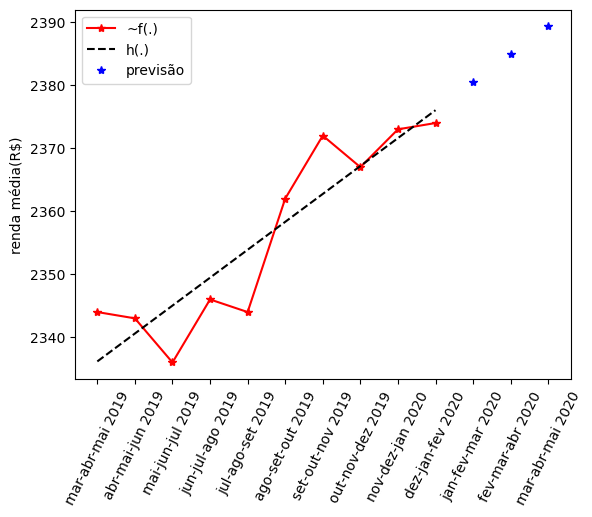

In [35]:
_timeRL = [[1, t] for t in _time]

lr = LinearRegression()
lr.fit(_timeRL, _data)

_dataRL = lr.predict(_timeRL)

_timeLabelForecast = time[96:]
_timeForecast = [i for i in range(len(_timeLabel), len(_timeLabel) + len(_timeLabelForecast))]
_dataForecast = lr.predict([[1, t] for t in _timeForecast])




config_plt()

plt.plot(_timeLabel, _data, 'r-*')
plt.plot(_timeLabel, _dataRL, 'k--')
plt.plot(_timeLabelForecast, _dataForecast, 'b*')

plt.legend(['~f(.)', 'h(.)', 'previsão'], loc=2)

**Atividade 4:**

Reproduza o mesmo experimento utilizando a classe *LinearRegression* do pacote *sklearn*

*from sklearn.linear_model import LinearRegression*


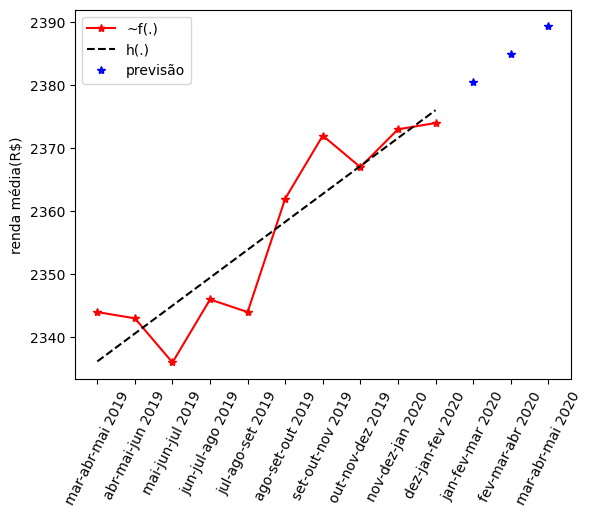

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Conjunto de treinamento
_data = data[86:96]  # Valores de renda média
_timeLabel = time[86:96]  # Posições correspondentes no tempo como strings
_time = [i for i in range(len(_timeLabel))]  # Índices dos labels de time


# Preparando dados para predição futura
_timePstring = time[96:]  # Posições futuras no tempo como strings
_timePredict = [i for i in range(len(_timeLabel), len(_timeLabel) + len(_timePstring))]  # Índices futuros


# Remodelando para deixar no formato do scikit
X_train = np.array(_time).reshape(-1, 1)
y_train = np.array(_data)
X_predict = np.array(_timePredict).reshape(-1, 1)


# Inicializando o modelo e aplicando o treino 
model = LinearRegression()
model.fit(X_train, y_train)

y_predict_train = model.predict(X_train)  # Previsão nos dados de treinamento para comparação
y_predict = model.predict(X_predict)


config_plt()

plt.plot(_timeLabel, _data, 'r-*')
plt.plot(_timeLabel, y_predict_train, 'k--')
plt.plot(_timePstring, y_predict, 'b*')
plt.legend(['~f(.)', 'h(.)', 'previsão'], loc=2)
plt.show()


